In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

%matplotlib inline

#### Drill: Prepare the Data

In [2]:
raw = pd.read_excel("Data/NYC_law_enforcement_2013.xls", header=4)

In [3]:
raw.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,3.480000e+02,348.000000,348.000000,0.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000
mean,4.003763e+04,201.594828,1.566092,NaN,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658
std,4.500374e+05,2815.268504,18.303673,NaN,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411
min,5.260000e+02,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,NaN,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,NaN,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,NaN,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,NaN,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


In [4]:
def robbery_binary(df):
    if df['Robbery'] > 1:
        return 1
    else:
        return 0

In [5]:
def murder_binary(df):
    if df['Murder and\nnonnegligent\nmanslaughter'] > 1:
        return 1
    else:
        return 0

In [6]:
raw['Robbery_binary'] = raw.apply(robbery_binary, axis=1)
raw['Murder_binary'] = raw.apply(murder_binary, axis=1)
raw['Property_Crime'] = raw['Property\ncrime']

In [7]:
data = pd.DataFrame()
data['Property_Crime'] = raw['Property\ncrime']
data['Murder'] = raw['Murder_binary']
data['Robbery'] = raw['Robbery_binary']
data['Population'] = raw['Population']
data['Pop_Squared'] = raw['Population']**2

In [8]:
data.head()

,Property_Crime,Murder,Robbery,Population,Pop_Squared
0,12.0,0,0,1861.0,3.463321e+06
1,24.0,0,0,2577.0,6.640929e+06
2,16.0,0,0,2846.0,8.099716e+06
3,4090.0,1,1,97956.0,9.595378e+09
4,223.0,0,1,6388.0,4.080654e+07


In [9]:
data = data.dropna()

In [10]:
variables = ['Murder', 'Robbery', 'Population', 'Pop_Squared']
x = data[variables]
y = data['Property_Crime']

In [11]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(x,y)

print('Coefficients: \n', lin_reg.coef_)
print('Intercept: \n', lin_reg.intercept_)

Coefficients: 
 [  4.46701518e+02  -1.05897820e+02   3.28129444e-02  -1.89739747e-09]
Intercept: 
 -111.468922903


In [19]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [20]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


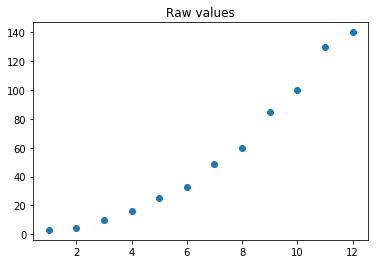

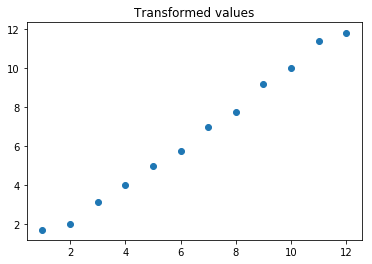

In [21]:
# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

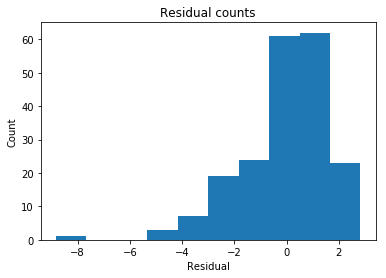

In [22]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

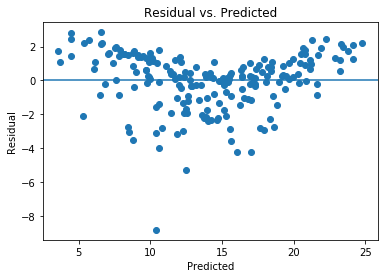

In [23]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [24]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


#### Drill: fixing assumptions
Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality. Use the cell(s) below to see what you can do to fix it

The plots show that there are some outliers to deal with.  

In [12]:
data.head()

,Property_Crime,Murder,Robbery,Population,Pop_Squared
0,12.0,0,0,1861.0,3.463321e+06
1,24.0,0,0,2577.0,6.640929e+06
2,16.0,0,0,2846.0,8.099716e+06
3,4090.0,1,1,97956.0,9.595378e+09
4,223.0,0,1,6388.0,4.080654e+07


In [15]:
print('Coefficients: \n', lin_reg.coef_)
print('Intercept: \n', lin_reg.intercept_)
print('\nR-squared:')
print(lin_reg.score(x, y))

Coefficients: 
 [  4.46701518e+02  -1.05897820e+02   3.28129444e-02  -1.89739747e-09]
Intercept: 
 -111.468922903

R-squared:
0.996232242853


In the previous section I noticed that there was a significant number of null variables. So after setting up a new data frame with the features required I dropped the null values from the dataframe. The resulting r - squared score, shown above, reveals that the features selected appear to capture a great deal of the models variance.